In [7]:
results = {
    'DecisionTree_precision': 0.85,
    'DecisionTree_recall': 0.78,
    'DecisionTree_f1_score': 0.81,
    'DecisionTree_accuracy': 0.83,
    'DecisionTree_auc' : 0.9,
    'RandomForest_precision': 0.92,
    'RandomForest_recall': 0.88,
    'RandomForest_f1_score': 0.90,
    'RandomForest_accuracy': 0.91,
    'RandomForest_auc' : 0.9,
    'AdaBoost_precision': 0.92,
    'AdaBoost_recall': 0.88,
    'AdaBoost_f1_score': 0.90,
    'AdaBoost_accuracy': 0.91,
    'AdaBoost_auc' : 0.9,

}

<Figure size 1200x800 with 0 Axes>

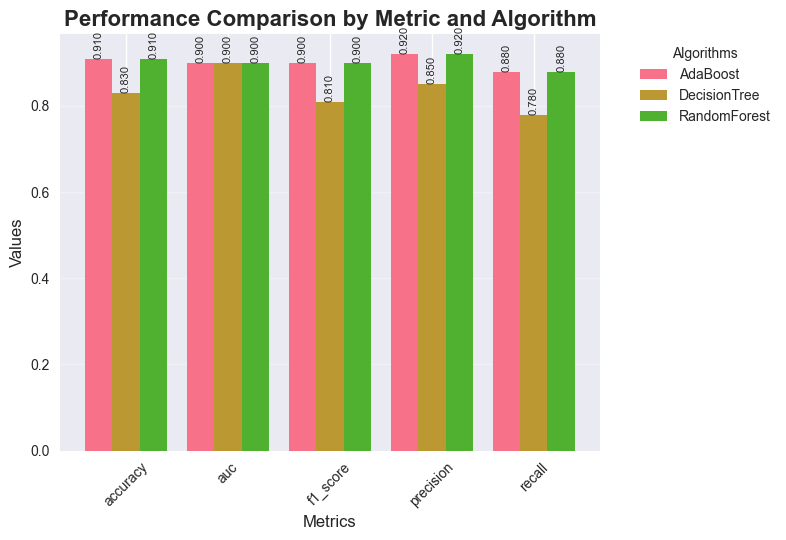

<Figure size 1200x800 with 0 Axes>

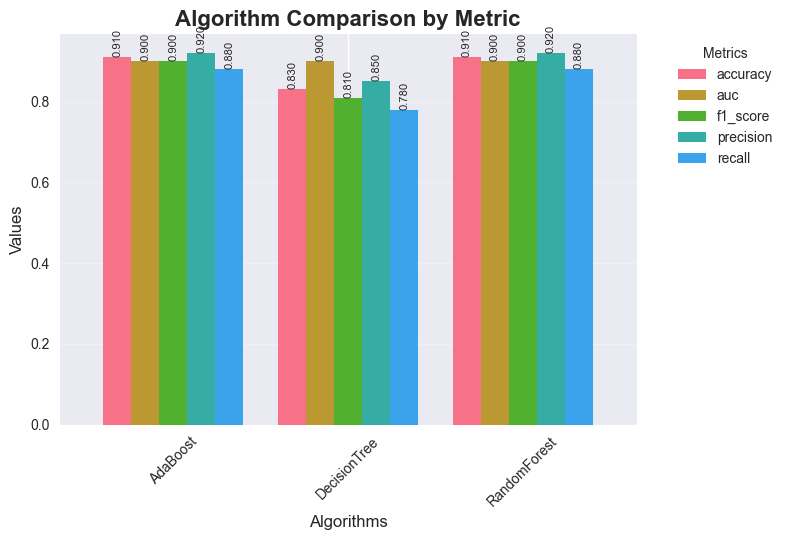

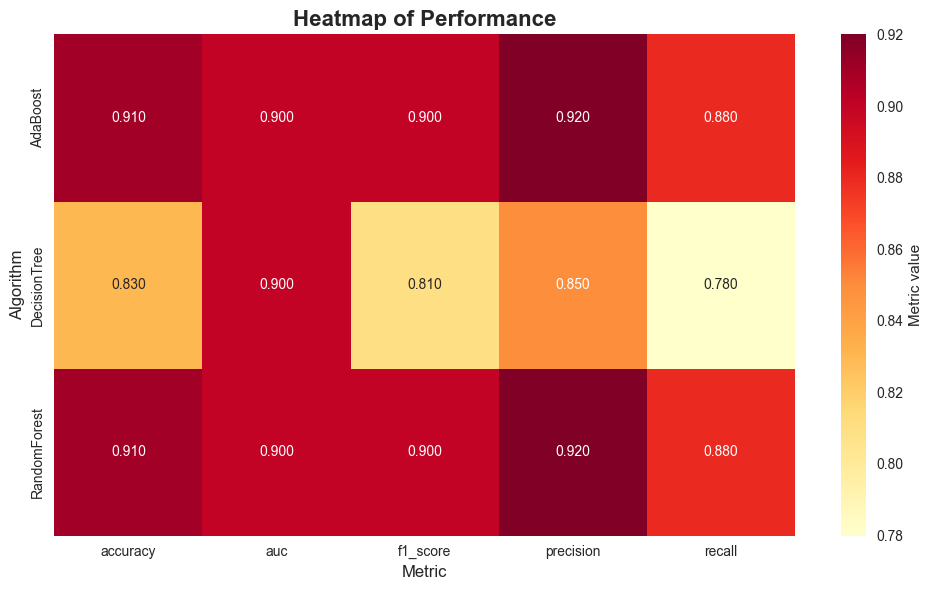

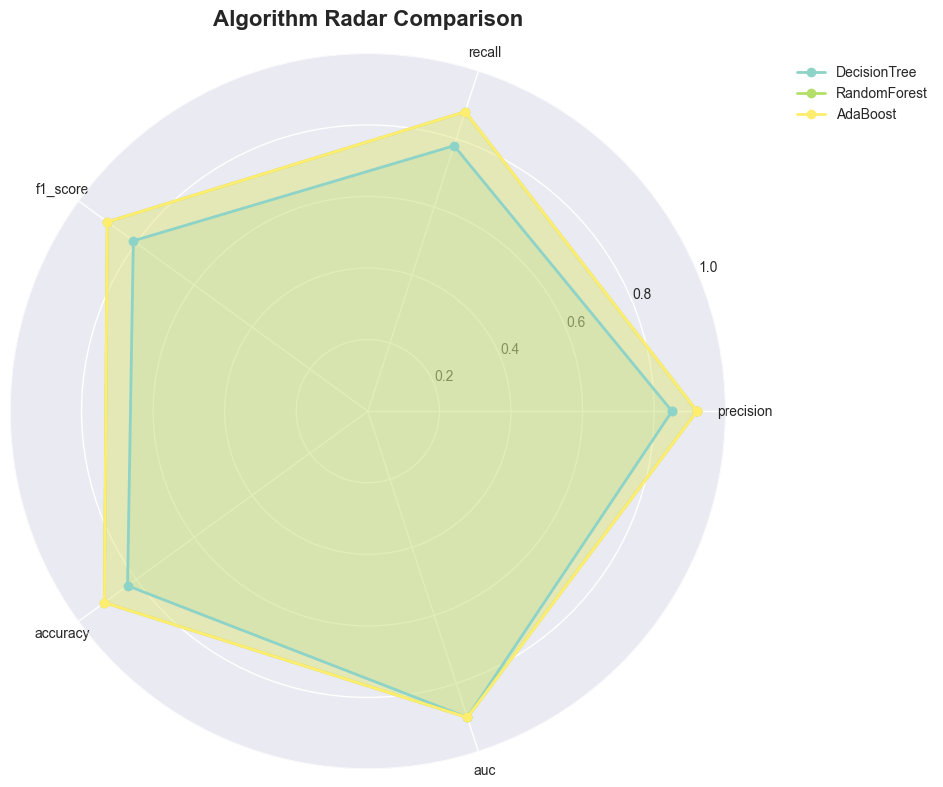

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.patches import Rectangle

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class AlgorithmComparisonVisualizer:
    def __init__(self, data_dict=None):
        self.data = data_dict
        self.df = self._create_dataframe()
    
    
    def _create_dataframe(self):
        rows = []
        for key, value in self.data.items():
            algorithm, metric = key.split('_', 1)
            rows.append({
                'Algorithm': algorithm,
                'Metric': metric,
                'Value': value
            })
        return pd.DataFrame(rows)
    
    def plot_grouped_bar_chart(self, figsize=(12, 8)):
            plt.figure(figsize=figsize)
            
            pivot_df = self.df.pivot(index='Metric', columns='Algorithm', values='Value')
            
            ax = pivot_df.plot(kind='bar', width=0.8)
            plt.title('Performance Comparison by Metric and Algorithm', fontsize=16, fontweight='bold')
            plt.xlabel('Metrics', fontsize=12)
            plt.ylabel('Values', fontsize=12)
            plt.legend(title='Algorithms', bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.xticks(rotation=45)
            plt.grid(axis='y', alpha=0.3)
            plt.tight_layout()
            
            for container in ax.containers:
                ax.bar_label(container, fmt='%.3f', rotation=90, fontsize=8)
            
            plt.show()
    
    def plot_heatmap(self, figsize=(10, 6)):
        plt.figure(figsize=figsize)

        pivot_df = self.df.pivot(index='Algorithm', columns='Metric', values='Value')
        
        sns.heatmap(pivot_df, annot=True, cmap='YlOrRd', fmt='.3f', 
                   cbar_kws={'label': 'Metric value'})
        plt.title('Heatmap of Performance', fontsize=16, fontweight='bold')
        plt.xlabel('Metric', fontsize=12)
        plt.ylabel('Algorithm', fontsize=12)
        plt.tight_layout()
        plt.show()
    
    def plot_radar_chart(self, figsize=(12, 8)):
        algorithms = self.df['Algorithm'].unique()
        metrics = self.df['Metric'].unique()

        angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
        angles += angles[:1] 
        
        fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(projection='polar'))
        
        colors = plt.cm.Set3(np.linspace(0, 1, len(algorithms)))
        
        for i, algorithm in enumerate(algorithms):
            values = []
            for metric in metrics:
                value = self.df[(self.df['Algorithm'] == algorithm) & 
                               (self.df['Metric'] == metric)]['Value'].iloc[0]
                values.append(value)
            
            values += values[:1] 
            
            ax.plot(angles, values, 'o-', linewidth=2, label=algorithm, color=colors[i])
            ax.fill(angles, values, alpha=0.25, color=colors[i])
        
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(metrics)
        ax.set_ylim(0, 1)
        ax.set_title('Algorithm Radar Comparison', fontsize=16, fontweight='bold', pad=20)
        ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
        ax.grid(True)
        
        plt.tight_layout()
        plt.show()
    
    def plot_algorithm_comparison(self, figsize=(12, 8)):
        plt.figure(figsize=figsize)

        pivot_df = self.df.pivot(index='Algorithm', columns='Metric', values='Value')
        
        ax = pivot_df.plot(kind='bar', width=0.8)
        plt.title('Algorithm Comparison by Metric', fontsize=16, fontweight='bold')
        plt.xlabel('Algorithms', fontsize=12)
        plt.ylabel('Values', fontsize=12)
        plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(rotation=45)
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        
        for container in ax.containers:
            ax.bar_label(container, fmt='%.3f', rotation=90, fontsize=8)
        
        plt.show()
    
    def generate_all_charts(self):
        self.plot_grouped_bar_chart()
        self.plot_algorithm_comparison()
        self.plot_heatmap()
        self.plot_radar_chart()
        
    

visualizer = AlgorithmComparisonVisualizer(results)
visualizer.generate_all_charts()